In [1]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import libraries
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

### Importing and Data Cleaning

In [3]:
df = pd.read_csv('data.csv', encoding= 'unicode_escape')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


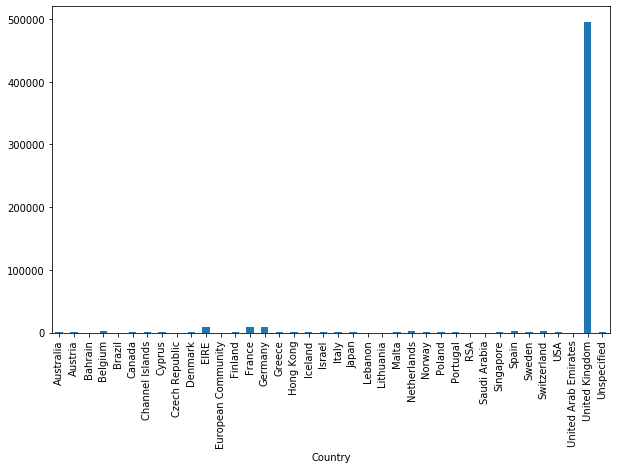

In [42]:
plt.figure(figsize=(10, 6))
df.groupby('Country').Country.count().plot.bar()

In [5]:
#creating a new dataframe with UK customers only
df_uk = df.query("Country=='United Kingdom'").reset_index(drop=True)
df_uk.describe()

,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,361878.000000
mean,8.605486,4.532422,15547.871368
std,227.588756,99.315438,1594.402590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495478 entries, 0 to 495477
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    495478 non-null  object 
 1   StockCode    495478 non-null  object 
 2   Description  494024 non-null  object 
 3   Quantity     495478 non-null  int64  
 4   InvoiceDate  495478 non-null  object 
 5   UnitPrice    495478 non-null  float64
 6   CustomerID   361878 non-null  float64
 7   Country      495478 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 30.2+ MB


In [7]:
df_uk.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [8]:
# Number of records with negative quantity
df_uk.Quantity[df_uk.Quantity < 0 ].count()

9192

In [9]:
# records with Negative Quantity
df_uk.loc[df_uk.Quantity < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
121,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
134,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
201,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
202,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
203,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [10]:
# negative Unit Price 
df_uk.UnitPrice[df_uk.UnitPrice < 0].count()

2

In [11]:
# records with negative price 
df_uk.loc[df_uk.UnitPrice < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
274532,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
274533,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [12]:
# dropping rows with negative quantity and unit price. Negative quantity would be orders that were cancelled
df_uk.drop(df_uk[df_uk['Quantity'] < 0].index, inplace = True)

In [13]:
df_uk.shape

(486286, 8)

In [14]:
df_uk.drop(df_uk[df_uk['UnitPrice'] < 0].index, inplace = True)

In [15]:
df_uk.shape

(486284, 8)

## Feature Engineering

In [22]:
#converting the type of Invoice Date Field from string to datetime.
df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'])
df_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
495473,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
495474,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
495475,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
495476,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


In [23]:
# calculate Revenue(Monetary) for each customer
df_uk['Monetary'] = df_uk['UnitPrice'] * df_uk['Quantity']
df_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
495473,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
495474,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
495475,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
495476,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


In [18]:
df_uk.describe()

,Quantity,UnitPrice,CustomerID,Monetary
count,486284.000000,486284.000000,354345.000000,486284.000000
mean,9.734676,3.840488,15552.436219,18.559570
std,163.262763,34.636460,1594.546025,280.945718
min,1.000000,0.000000,12346.000000,0.000000
25%,1.000000,1.250000,14194.000000,3.360000
50%,3.000000,2.100000,15522.000000,8.400000
75%,10.000000,4.130000,16931.000000,16.950000
max,80995.000000,13541.330000,18287.000000,168469.600000


# RFM MODELLING

In [25]:
# Generate new dataframe based on unique CustomerID to keep track of RFM scores
customer = pd.DataFrame(df_uk['CustomerID'].unique())
customer.columns = ['CustomerID']


# Generate new data frame based on latest Invoice date from df_uk dataframe per Customer (groupby = CustomerID)
recency = df_uk.groupby('CustomerID').InvoiceDate.max().reset_index()
recency.columns = ['CustomerID','LastPurchaseDate']


# Set observation point as the last invoice date in the dataset
LastInvoiceDate = recency['LastPurchaseDate'].max()


# Generate Recency in days by subtracting the Last Purchase date for each customer from the Last Invoice Date
recency['Recency'] = (LastInvoiceDate - recency['LastPurchaseDate']).dt.days


# Consolidate to customer DataFrame
customer = pd.merge(customer, recency[['CustomerID','Recency']], on='CustomerID')
customer.head()

,CustomerID,Recency
0,17850.0,371
1,13047.0,31
2,13748.0,95
3,15100.0,333
4,15291.0,25


In [26]:
# Count number of invoices per CustomerID and store in new frequency Dataframe
frequency = df_uk.groupby('CustomerID').InvoiceDate.count().reset_index()
frequency.columns = ['CustomerID','Frequency']


# Consolidate Frequency to existing Customer DataFrame

customer = pd.merge(customer, frequency, on='CustomerID')
customer.head()

,CustomerID,Recency,Frequency
0,17850.0,371,297
1,13047.0,31,172
2,13748.0,95,28
3,15100.0,333,3
4,15291.0,25,103


In [27]:
# Grouping monetary per Customer ID
revenue = df_uk.groupby('CustomerID').Monetary.sum().reset_index()
# Consolidate Monetary to existing Customer DataFrame
customer = pd.merge(customer, revenue, on='CustomerID')

customer.head()

,CustomerID,Recency,Frequency,Monetary
0,17850.0,371,297,5391.21
1,13047.0,31,172,3237.54
2,13748.0,95,28,948.25
3,15100.0,333,3,876.00
4,15291.0,25,103,4668.30


In [28]:
customer.describe()

,CustomerID,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,15561.471563,91.188472,90.371079,1863.910113
std,1576.823683,99.528995,217.796155,7481.922217
min,12346.000000,0.000000,1.000000,0.000000
25%,14208.000000,17.000000,17.000000,300.040000
50%,15569.000000,50.000000,41.000000,651.820000
75%,16913.000000,142.000000,99.000000,1575.890000
max,18287.000000,373.000000,7847.000000,259657.300000


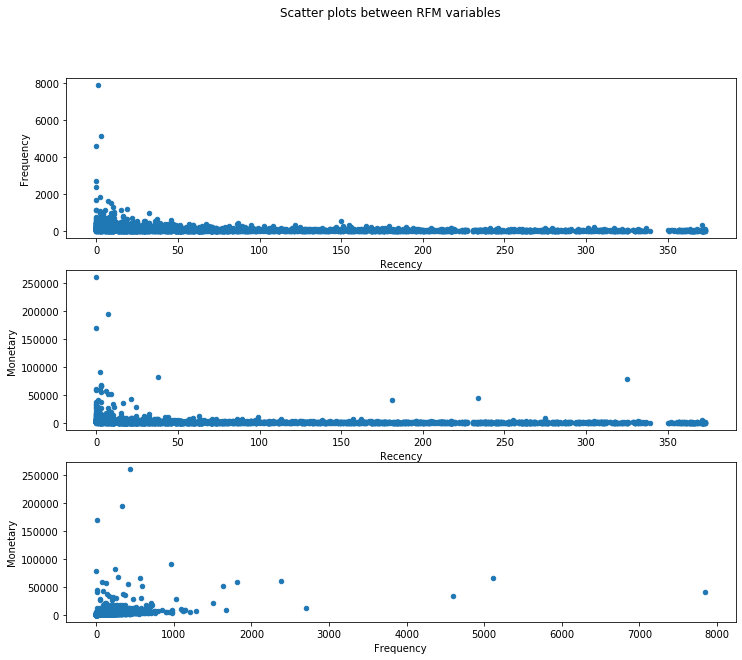

In [43]:
# Finally lets review the scatter plots between the different variables

fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Scatter plots between RFM variables')
customer.plot.scatter(x = 'Recency', y = 'Frequency', ax = ax1, figsize = (12,10))
customer.plot.scatter(x = 'Recency', y = 'Monetary', ax = ax2)
customer.plot.scatter(x = 'Frequency', y = 'Monetary', ax = ax3)

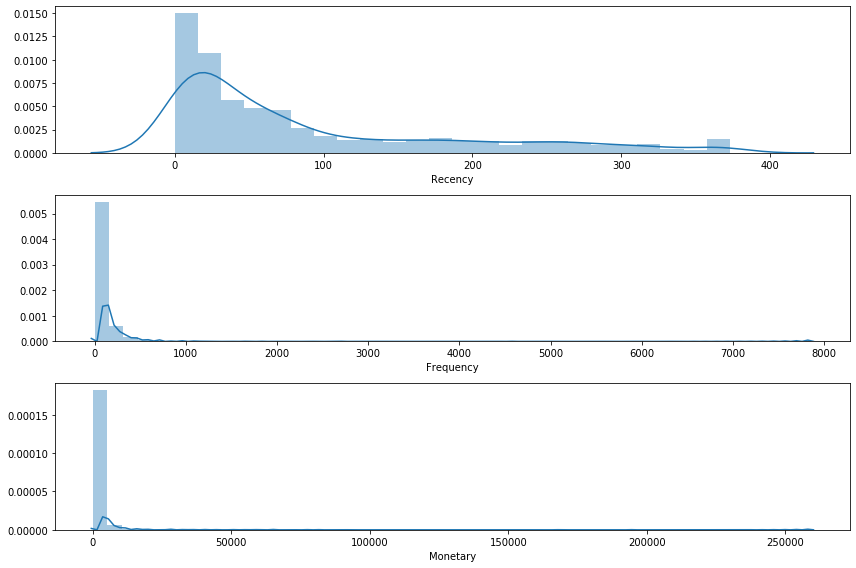

In [30]:
# plot the distribution of RFM values
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)
plt.subplot(3, 1, 1); sns.distplot(customer.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(customer.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(customer.Monetary, label = 'Monetary')

plt.tight_layout()
plt.show()

# Standardization
The range of variables shows large variation. K-Means is distance based, so adjusting range common range is required to avoid building biased model.

In [31]:
from sklearn.preprocessing import StandardScaler

# feature columns
feature_cols = ['Recency','Frequency','Monetary']

# standardized df for training
standardized_data = customer.copy()

# standardization
scaler = StandardScaler()
scaler.fit(customer[feature_cols])
standardized_features = scaler.transform(customer[feature_cols])
standardized_data[feature_cols] = standardized_features
standardized_data[feature_cols]

,Recency,Frequency,Monetary
0,2.811715,0.948847,0.471503
1,-0.604810,0.374843,0.183617
2,0.038301,-0.286410,-0.122399
3,2.429868,-0.401211,-0.132056
4,-0.665102,0.057992,0.374870
...,...,...,...
3916,-0.906268,-0.061400,-0.186397
3917,-0.906268,-0.359883,-0.222835
3918,-0.906268,-0.332331,-0.203237
3919,-0.916317,-0.405803,-0.201031


## Using the Elbow Method to find K

In [32]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples,silhouette_score

Inertias = []
Silhouette_score = []

list_k = list(range(2, 11))

for k in list_k:
    kmeans = KMeans(n_clusters=k, init = 'k-means++', random_state=42)
    kmeans.fit(standardized_data[feature_cols])
    Inertias.append(kmeans.inertia_)
    Silhouette_score.append(metrics.silhouette_score(standardized_data[feature_cols], kmeans.labels_, metric='euclidean'))

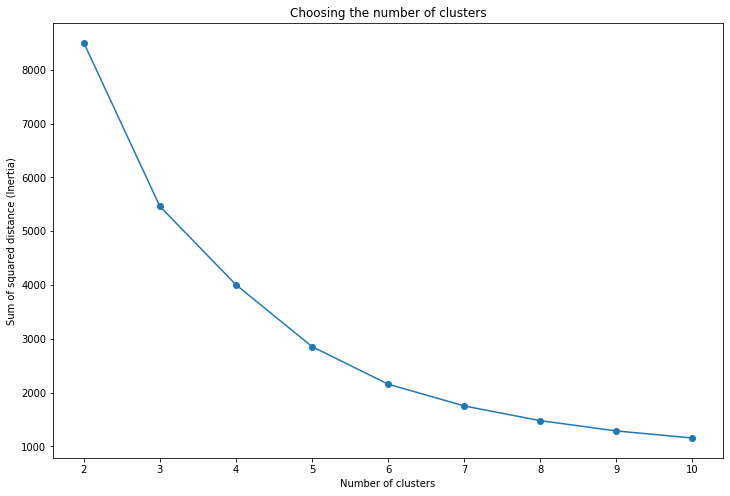

In [33]:
# Elbow method plot
plt.figure(figsize=(12, 8))
plt.plot(list_k, Inertias, '-o')
plt.title('Choosing the number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance (Inertia)');
plt.show()

In [34]:
#Silhouette score values for each cluster
print('For',list_k,'The Silhouette Score is =',Silhouette_score)

For [2, 3, 4, 5, 6, 7, 8, 9, 10] The Silhouette Score is = [0.5670035586453481, 0.5923165789101865, 0.595346572683683, 0.6166676454106936, 0.5920484260553989, 0.5185202838609332, 0.5071004938794107, 0.5044048049785956, 0.4834546585586507]


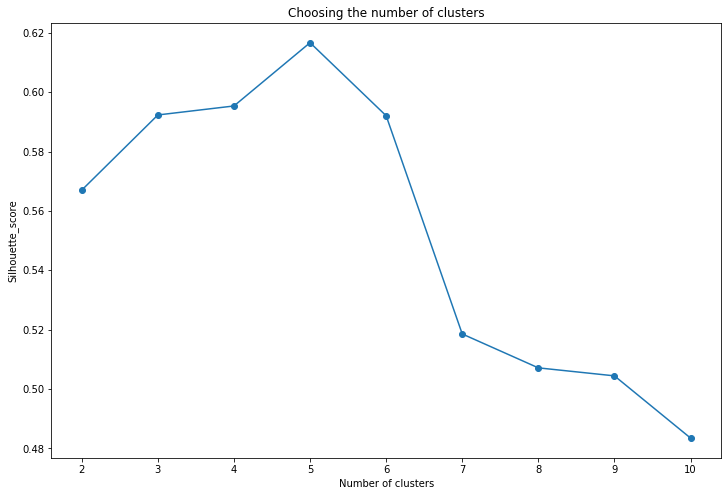

In [35]:
# plotting the silhoutte score
plt.figure(figsize=(12, 8))
plt.plot(list_k, Silhouette_score, '-o')
plt.title('Choosing the number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette_score');
plt.show()

## Choosing 4 clusters. Although the ss of 5 is the highest, the difference between it and the next score is wide. This could cause overfitting. therefore, I'll choose 4 clusters.

## Fit K-means using optimal K=4

In [36]:
# run kmeans with the optimal k
kmeans = KMeans(n_clusters=4, init = 'k-means++', random_state=42)
kmeans.fit(standardized_data[feature_cols])
customer['Cluster'] = kmeans.labels_
customer.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,17850.0,371,297,5391.21,0
1,13047.0,31,172,3237.54,3
2,13748.0,95,28,948.25,3
3,15100.0,333,3,876.00,0
4,15291.0,25,103,4668.30,3


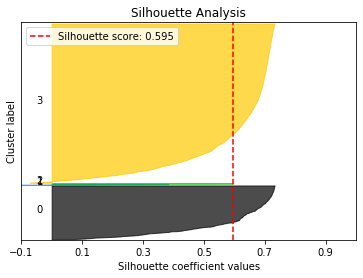

In [37]:
import scikitplot as skplt
 
skplt.metrics.plot_silhouette(standardized_data[feature_cols], customer['Cluster'])

plt.show()

## Analyze the resulted cluster

In [45]:
# look at the mean per cluster
result_df = customer.groupby('Cluster')[['Recency', 'Frequency', 'Monetary','CustomerID']].agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary':'mean','CustomerID':'nunique'}).reset_index()
result_df = result_df.rename(columns = {'CustomerID':'Number of Buyers'})
result_df

,Cluster,Recency,Frequency,Monetary,Number of Buyers
0,0,243.905680,27.716024,534.658956,986
1,1,27.000000,656.533333,92970.318000,15
2,2,1.333333,5851.333333,46625.363333,3
3,3,39.989715,102.713404,1798.692822,2917


In [46]:
customer['Segments'] = customer['Cluster']
customer['Segments'].replace({0: "Lost", 1: "Best", 2: "Regular/Loyal", 3: 'At risk of leaving'}, inplace = True)

In [47]:
customer

,CustomerID,Recency,Frequency,Monetary,Cluster,Segments
0,17850.0,371,297,5391.21,0,Lost
1,13047.0,31,172,3237.54,3,At risk of leaving
2,13748.0,95,28,948.25,3,At risk of leaving
3,15100.0,333,3,876.00,0,Lost
4,15291.0,25,103,4668.30,3,At risk of leaving
...,...,...,...,...,...,...
3916,15471.0,1,77,469.48,3,At risk of leaving
3917,13436.0,1,12,196.89,3,At risk of leaving
3918,15520.0,1,18,343.50,3,At risk of leaving
3919,13298.0,0,2,360.00,3,At risk of leaving


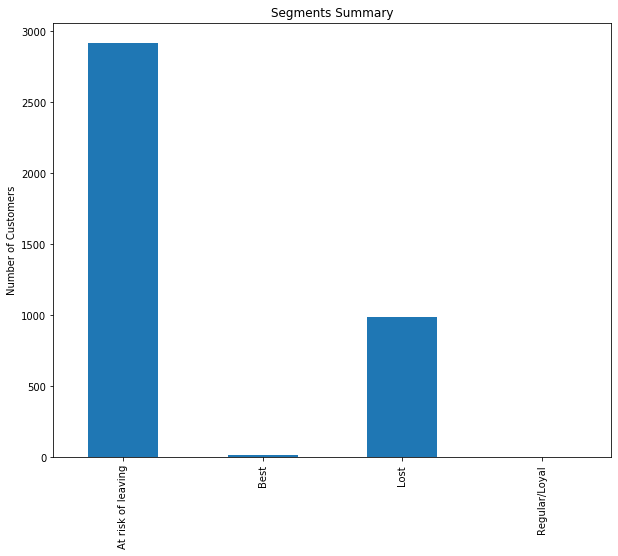

In [50]:
plt.figure(figsize=(10, 8))
customer.groupby('Segments').Segments.count().plot.bar()
plt.xlabel('')
plt.ylabel("Number of Customers")
plt.title("Segments Summary");